In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as st
import sklearn.datasets as dta
# Dependencies
import json
import requests
import matplotlib.style as style

In [2]:
csv_path = "archive/imdb_top_1000.csv"

# Import the CSV into a pandas DataFrame
topmovies_df = pd.read_csv(csv_path, low_memory=False)


In [3]:
#drop null rows
topmovies_df=topmovies_df[["Genre","IMDB_Rating","Certificate","Gross"]]
no_null_topmovies_df = topmovies_df.dropna(how='any')
topmovies_df=no_null_topmovies_df
no_null_topmovies_df.count()

Genre          785
IMDB_Rating    785
Certificate    785
Gross          785
dtype: int64

In [4]:
cleaned_topmovies_df=topmovies_df[["Genre", "IMDB_Rating"]]
cleaned_topmovies_df.head()

,Genre,IMDB_Rating
0,Drama,9.3
1,"Crime, Drama",9.2
2,"Action, Crime, Drama",9.0
3,"Crime, Drama",9.0
4,"Crime, Drama",9.0


In [5]:
genre_values=topmovies_df["Genre"].value_counts()
genre_values

Drama                         64
Drama, Romance                29
Comedy, Drama                 26
Comedy, Drama, Romance        25
Biography, Drama, History     23
                              ..
Crime, Film-Noir, Mystery      1
Comedy, Crime, Romance         1
Action, Adventure, Family      1
Animation, Action, Fantasy     1
Comedy, Family, Fantasy        1
Name: Genre, Length: 178, dtype: int64

In [6]:
cleaned_topmovies_df.astype({'IMDB_Rating': 'str'}).dtypes

Genre          object
IMDB_Rating    object
dtype: object

In [7]:
result = cleaned_topmovies_df.set_index('IMDB_Rating').apply(lambda col:
    col.str.split(', ?', expand=True).stack())\
    .droplevel(1).reset_index().fillna('')

result

,IMDB_Rating,Genre
0,9.3,Drama
1,9.2,Crime
2,9.2,Drama
3,9.0,Action
4,9.0,Crime
...,...,...
2005,7.6,Music
2006,7.6,Musical
2007,7.6,Drama
2008,7.6,Romance


In [8]:
genre_values=result["Genre"].value_counts()
genre_values

Drama        557
Comedy       184
Adventure    168
Crime        160
Action       152
Thriller     104
Romance      101
Biography     96
Mystery       81
Animation     66
Sci-Fi        59
Fantasy       56
Family        46
History       42
Music         31
War           31
Sport         19
Horror        18
Western       16
Musical       14
Film-Noir      9
Name: Genre, dtype: int64

In [9]:
#Count of Genre Types in alphabetical order (series)
genre_values_sorted = genre_values.sort_index(axis=0, ascending=True)
genre_values_sorted

Action       152
Adventure    168
Animation     66
Biography     96
Comedy       184
Crime        160
Drama        557
Family        46
Fantasy       56
Film-Noir      9
History       42
Horror        18
Music         31
Musical       14
Mystery       81
Romance      101
Sci-Fi        59
Sport         19
Thriller     104
War           31
Western       16
Name: Genre, dtype: int64

In [10]:
genre_values_sorted.count()

21

In [11]:
#Sum of the ratings in alphabetical order
grouped_genre_values = result.groupby("Genre")["IMDB_Rating"].sum()
grouped_genre_values


Genre
Action       1208.2
Adventure    1338.4
Animation     523.2
Biography     760.8
Comedy       1452.9
Crime        1273.9
Drama        4431.1
Family        363.2
Fantasy       442.7
Film-Noir      72.1
History       332.8
Horror        142.2
Music         245.2
Musical       110.8
Mystery       645.2
Romance       801.2
Sci-Fi        471.4
Sport         150.6
Thriller      824.1
War           248.8
Western       128.6
Name: IMDB_Rating, dtype: float64

In [12]:
grouped_genre_values.count()

21

In [13]:
#Sum of the ratings in alphabetial order into a dataframe, and column is renamed. 
grouped_genre_values_df=grouped_genre_values.to_frame()
grouped_genre_values_df.rename(columns={"IMDB_Rating": "Sum_Rating_By_Genre_Type"})
grouped_genre_values_df

,IMDB_Rating
Genre,
Action,1208.2
Adventure,1338.4
Animation,523.2
Biography,760.8
Comedy,1452.9
Crime,1273.9
Drama,4431.1
Family,363.2
Fantasy,442.7


In [14]:
type(grouped_genre_values_df)

pandas.core.frame.DataFrame

In [15]:
counted_genre_types_df=genre_values_sorted.to_frame()
counted_genre_types_df

,Genre
Action,152
Adventure,168
Animation,66
Biography,96
Comedy,184
Crime,160
Drama,557
Family,46
Fantasy,56
Film-Noir,9


In [16]:
counted_genre_types_df.count()

Genre    21
dtype: int64

In [17]:
type(counted_genre_types_df)

pandas.core.frame.DataFrame

In [18]:
joined_result = pd.concat([grouped_genre_values_df, counted_genre_types_df], axis=1, join='inner')
display(joined_result)

,IMDB_Rating,Genre
Action,1208.2,152
Adventure,1338.4,168
Animation,523.2,66
Biography,760.8,96
Comedy,1452.9,184
Crime,1273.9,160
Drama,4431.1,557
Family,363.2,46
Fantasy,442.7,56
Film-Noir,72.1,9


In [19]:
joined_result=joined_result.rename(columns={"Genre": "Genre_Count"})

In [20]:
joined_result = joined_result.rename_axis('Genre')


In [21]:
joined_result

,IMDB_Rating,Genre_Count
Genre,,
Action,1208.2,152
Adventure,1338.4,168
Animation,523.2,66
Biography,760.8,96
Comedy,1452.9,184
Crime,1273.9,160
Drama,4431.1,557
Family,363.2,46
Fantasy,442.7,56


In [22]:
total_IMDB_Rating_for_all_genre_types = joined_result["IMDB_Rating"].sum()
total_IMDB_Rating_for_all_genre_types

15967.400000000007

In [23]:
total_Genre_Count_for_all_genre_types = joined_result["Genre_Count"].sum()
total_Genre_Count_for_all_genre_types 

2010

In [24]:
Averages=joined_result["IMDB_Rating"]/joined_result["Genre_Count"]



In [25]:

joined_result["Averages_By_Genre"] = Averages

In [26]:
joined_result

,IMDB_Rating,Genre_Count,Averages_By_Genre
Genre,,,
Action,1208.2,152,7.948684
Adventure,1338.4,168,7.966667
Animation,523.2,66,7.927273
Biography,760.8,96,7.925000
Comedy,1452.9,184,7.896196
Crime,1273.9,160,7.961875
Drama,4431.1,557,7.955296
Family,363.2,46,7.895652
Fantasy,442.7,56,7.905357


In [27]:
joined_result.describe()

,IMDB_Rating,Genre_Count,Averages_By_Genre
count,21.000000,21.000000,21.000000
mean,760.352381,95.714286,7.944880
std,946.792169,119.045009,0.042110
min,72.100000,9.000000,7.895652
25%,245.200000,31.000000,7.914286
50%,471.400000,59.000000,7.927273
75%,824.100000,104.000000,7.965432
max,4431.100000,557.000000,8.037500


In [28]:
joined_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Action to Western
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IMDB_Rating        21 non-null     float64
 1   Genre_Count        21 non-null     int64  
 2   Averages_By_Genre  21 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2+ KB


In [29]:
gross_cleaned_topmovies_df=topmovies_df[["Genre", "Gross"]]
gross_cleaned_topmovies_df.head()

,Genre,Gross
0,Drama,"28,341,469"
1,"Crime, Drama","134,966,411"
2,"Action, Crime, Drama","534,858,444"
3,"Crime, Drama","57,300,000"
4,"Crime, Drama","4,360,000"


In [30]:
result_gross = gross_cleaned_topmovies_df.set_index('Gross').apply(lambda col:
    col.str.split(', ?', expand=True).stack())\
    .droplevel(1).reset_index().fillna('')

result_gross

,Gross,Genre
0,"28,341,469",Drama
1,"134,966,411",Crime
2,"134,966,411",Drama
3,"534,858,444",Action
4,"534,858,444",Crime
...,...,...
2005,"13,780,024",Music
2006,"13,780,024",Musical
2007,"30,500,000",Drama
2008,"30,500,000",Romance


In [32]:
result_gross.dtypes

Gross    float64
Genre     object
dtype: object

In [31]:
#CAUTION: Run this cell when running all previus cells, then comment this cell. 
#result_gross.loc[:,"Gross"]=result_gross.loc[:,"Gross"].str.replace(",","").astype(float)

In [34]:
#CAUTION: Run this cell when running all previus cells, then comment this cell. 
#Gross value is now in units of 100k in usd
#Gross=result_gross["Gross"]/100000
#result_gross["Gross"]=Gross.round(2)
#result_gross

,Gross,Genre
0,283.41,Drama
1,1349.66,Crime
2,1349.66,Drama
3,5348.58,Action
4,5348.58,Crime
...,...,...
2005,137.80,Music
2006,137.80,Musical
2007,305.00,Drama
2008,305.00,Romance


In [35]:
#Count of Genre Types & Gross
genre_gross_values=result_gross["Genre"].value_counts()
genre_gross_values

Drama        557
Comedy       184
Adventure    168
Crime        160
Action       152
Thriller     104
Romance      101
Biography     96
Mystery       81
Animation     66
Sci-Fi        59
Fantasy       56
Family        46
History       42
Music         31
War           31
Sport         19
Horror        18
Western       16
Musical       14
Film-Noir      9
Name: Genre, dtype: int64

In [36]:
#Count of Genre Types & Gross in alphabetical order (series)
genre_gross_values_sorted = genre_values.sort_index(axis=0, ascending=True)
genre_gross_values_sorted

Action       152
Adventure    168
Animation     66
Biography     96
Comedy       184
Crime        160
Drama        557
Family        46
Fantasy       56
Film-Noir      9
History       42
Horror        18
Music         31
Musical       14
Mystery       81
Romance      101
Sci-Fi        59
Sport         19
Thriller     104
War           31
Western       16
Name: Genre, dtype: int64

In [37]:
#Sum of the gross in alphabetical order
grouped_genre_gross_values = result_gross.groupby("Genre")["Gross"].sum()
grouped_genre_gross_values


Genre
Action       219877.96
Adventure    281283.29
Animation     85731.37
Biography     53045.78
Comedy       121836.27
Crime         69426.56
Drama        273952.14
Family        44574.34
Fantasy       60825.44
Film-Noir       508.31
History       23881.49
Horror         8754.67
Music         10752.77
Musical        2827.91
Mystery       34529.42
Romance       43064.62
Sci-Fi        90240.14
Sport         10197.69
Thriller      64365.90
War           13629.71
Western        8563.01
Name: Gross, dtype: float64

In [38]:
#Sum of the gross in alphabetial order into a dataframe, and column is renamed. 
grouped_genre_gross_values_df=grouped_genre_gross_values.to_frame()
grouped_genre_gross_values_df

,Gross
Genre,
Action,219877.96
Adventure,281283.29
Animation,85731.37
Biography,53045.78
Comedy,121836.27
Crime,69426.56
Drama,273952.14
Family,44574.34
Fantasy,60825.44


In [39]:
#Sum of the genre by Genre Type
counted_genre_gross_values_df=genre_gross_values_sorted.to_frame()
counted_genre_gross_values_df

,Genre
Action,152
Adventure,168
Animation,66
Biography,96
Comedy,184
Crime,160
Drama,557
Family,46
Fantasy,56
Film-Noir,9


In [40]:
#Concat the two dataframes together to get the gross revenue by the each genre type
joined_gross_result = pd.concat([grouped_genre_gross_values_df,counted_genre_gross_values_df], axis=1, join='inner')
display(joined_gross_result)

,Gross,Genre
Action,219877.96,152
Adventure,281283.29,168
Animation,85731.37,66
Biography,53045.78,96
Comedy,121836.27,184
Crime,69426.56,160
Drama,273952.14,557
Family,44574.34,46
Fantasy,60825.44,56
Film-Noir,508.31,9


In [41]:
joined_gross_result=joined_gross_result.rename(columns={"Genre": "Genre_Count"})
joined_gross_result=joined_gross_result.rename(columns={"Gross": "Total_Gross"})
joined_gross_result = joined_gross_result.rename_axis('Genre')

In [42]:
joined_gross_result

,Total_Gross,Genre_Count
Genre,,
Action,219877.96,152
Adventure,281283.29,168
Animation,85731.37,66
Biography,53045.78,96
Comedy,121836.27,184
Crime,69426.56,160
Drama,273952.14,557
Family,44574.34,46
Fantasy,60825.44,56


In [43]:
Averages=joined_gross_result["Total_Gross"]/joined_gross_result["Genre_Count"]

In [44]:
joined_gross_result["Averages"] = Averages

In [45]:
joined_gross_result

,Total_Gross,Genre_Count,Averages
Genre,,,
Action,219877.96,152,1446.565526
Adventure,281283.29,168,1674.305298
Animation,85731.37,66,1298.960152
Biography,53045.78,96,552.560208
Comedy,121836.27,184,662.153641
Crime,69426.56,160,433.916000
Drama,273952.14,557,491.835081
Family,44574.34,46,969.007391
Fantasy,60825.44,56,1086.168571


In [46]:
joined_gross_result.dtypes

Total_Gross    float64
Genre_Count      int64
Averages       float64
dtype: object

In [47]:
grouped_certificate = topmovies_df.groupby("Certificate")["IMDB_Rating"].sum()
grouped_certificate


Certificate
A           1440.5
Approved      48.1
G             80.3
GP            15.7
PG           189.7
PG-13        303.5
Passed       185.4
R           1062.7
TV-PG          8.0
U           1593.8
U/A            7.6
UA          1296.1
Unrated        8.1
Name: IMDB_Rating, dtype: float64

In [48]:
grouped_certificate.count()

13

In [49]:
grouped_certificate_df=grouped_certificate.to_frame()
grouped_certificate_df.rename(columns={"IMDB_Rating": "Sum_Rating_By_Certificate_Type"})

,Sum_Rating_By_Certificate_Type
Certificate,
A,1440.5
Approved,48.1
G,80.3
GP,15.7
PG,189.7
PG-13,303.5
Passed,185.4
R,1062.7
TV-PG,8.0


In [50]:
genre_certificate_count=topmovies_df["Certificate"].value_counts()
genre_certificate_count





U           200
A           180
UA          163
R           135
PG-13        39
PG           24
Passed       23
G            10
Approved      6
GP            2
Unrated       1
U/A           1
TV-PG         1
Name: Certificate, dtype: int64

In [51]:
grouped_certificate_count_sorted = genre_certificate_count.sort_index(axis=0, ascending=True)
grouped_certificate_count_sorted


certificate_count_df=grouped_certificate_count_sorted.to_frame()
certificate_count_df



,Certificate
A,180
Approved,6
G,10
GP,2
PG,24
PG-13,39
Passed,23
R,135
TV-PG,1
U,200


In [52]:
joined_certificate_result = pd.concat([grouped_certificate_df,certificate_count_df], axis=1, join='inner')
display(joined_certificate_result)

,IMDB_Rating,Certificate
A,1440.5,180
Approved,48.1,6
G,80.3,10
GP,15.7,2
PG,189.7,24
PG-13,303.5,39
Passed,185.4,23
R,1062.7,135
TV-PG,8.0,1
U,1593.8,200


In [53]:
joined_certificate_result=joined_certificate_result.rename(columns={"IMDB_Rating": "Total Rating"})
joined_certificate_result=joined_certificate_result.rename(columns={"Certificate": "Certificate Count"})
joined_certificate_result = joined_certificate_result.rename_axis('Certificate')

In [54]:
Averages_Certificate=joined_certificate_result["Total Rating"]/joined_certificate_result["Certificate Count"]

In [55]:
joined_certificate_result["Averages"] = Averages_Certificate

In [56]:
joined_certificate_result

,Total Rating,Certificate Count,Averages
Certificate,,,
A,1440.5,180,8.002778
Approved,48.1,6,8.016667
G,80.3,10,8.030000
GP,15.7,2,7.850000
PG,189.7,24,7.904167
PG-13,303.5,39,7.782051
Passed,185.4,23,8.060870
R,1062.7,135,7.871852
TV-PG,8.0,1,8.000000


In [57]:
topmovies_df.dtypes

Genre           object
IMDB_Rating    float64
Certificate     object
Gross           object
dtype: object

In [58]:
#CAUTION: Run this cell when running all previus cells, then comment this cell. 
#topmovies_df.loc[:,"Gross"]=topmovies_df.loc[:,"Gross"].str.replace(",","").astype(float)

In [59]:
#CAUTION: Run this cell when running all previus cells, then comment this cell. 
#Gross=topmovies_df["Gross"]/100000
#topmovies_df["Gross"]=Gross.round(2)


grouped_certificate_gross = topmovies_df.groupby("Certificate")["Gross"].sum()
grouped_certificate_gross

Certificate
A           114996.84
Approved       416.94
G             4959.63
GP              14.17
PG            4293.19
PG-13        14409.69
Passed        1250.18
R            34821.37
TV-PG            1.07
U           174493.14
U/A            260.21
UA          213767.89
Unrated          3.00
Name: Gross, dtype: float64

In [60]:
grouped_certificate_gross_df=grouped_certificate_gross.to_frame()
grouped_certificate_gross_df

,Gross
Certificate,
A,114996.84
Approved,416.94
G,4959.63
GP,14.17
PG,4293.19
PG-13,14409.69
Passed,1250.18
R,34821.37
TV-PG,1.07


In [61]:
certificate_count_df

,Certificate
A,180
Approved,6
G,10
GP,2
PG,24
PG-13,39
Passed,23
R,135
TV-PG,1
U,200


In [62]:
joined_certificate_gross_result = pd.concat([grouped_certificate_gross_df,certificate_count_df], axis=1, join='inner')
display(joined_certificate_gross_result)

,Gross,Certificate
A,114996.84,180
Approved,416.94,6
G,4959.63,10
GP,14.17,2
PG,4293.19,24
PG-13,14409.69,39
Passed,1250.18,23
R,34821.37,135
TV-PG,1.07,1
U,174493.14,200


In [63]:
joined_certificate_gross_result=joined_certificate_gross_result.rename(columns={"Gross": "Total Gross"})
joined_certificate_gross_result=joined_certificate_gross_result.rename(columns={"Certificate": "Certificate Count"})
joined_certificate_gross_result = joined_certificate_gross_result.rename_axis('Certificate')
joined_certificate_gross_result

,Total Gross,Certificate Count
Certificate,,
A,114996.84,180
Approved,416.94,6
G,4959.63,10
GP,14.17,2
PG,4293.19,24
PG-13,14409.69,39
Passed,1250.18,23
R,34821.37,135
TV-PG,1.07,1


In [64]:
Averages_Certificate_Gross=joined_certificate_gross_result["Total Gross"]/joined_certificate_gross_result["Certificate Count"]

In [65]:
joined_certificate_gross_result["Averages"] = Averages_Certificate_Gross

In [66]:
#Averages in units of 100k in usd
joined_certificate_gross_result

,Total Gross,Certificate Count,Averages
Certificate,,,
A,114996.84,180,638.871333
Approved,416.94,6,69.490000
G,4959.63,10,495.963000
GP,14.17,2,7.085000
PG,4293.19,24,178.882917
PG-13,14409.69,39,369.479231
Passed,1250.18,23,54.355652
R,34821.37,135,257.936074
TV-PG,1.07,1,1.070000


In [67]:
joined_result

,IMDB_Rating,Genre_Count,Averages_By_Genre
Genre,,,
Action,1208.2,152,7.948684
Adventure,1338.4,168,7.966667
Animation,523.2,66,7.927273
Biography,760.8,96,7.925000
Comedy,1452.9,184,7.896196
Crime,1273.9,160,7.961875
Drama,4431.1,557,7.955296
Family,363.2,46,7.895652
Fantasy,442.7,56,7.905357


In [68]:
joined_result=joined_result.reset_index()

In [69]:
joined_result

,Genre,IMDB_Rating,Genre_Count,Averages_By_Genre
0,Action,1208.2,152,7.948684
1,Adventure,1338.4,168,7.966667
2,Animation,523.2,66,7.927273
3,Biography,760.8,96,7.925000
4,Comedy,1452.9,184,7.896196
5,Crime,1273.9,160,7.961875
6,Drama,4431.1,557,7.955296
7,Family,363.2,46,7.895652
8,Fantasy,442.7,56,7.905357
9,Film-Noir,72.1,9,8.011111


In [70]:
joined_result["Averages_By_Genre"].min() #Family

7.895652173913049

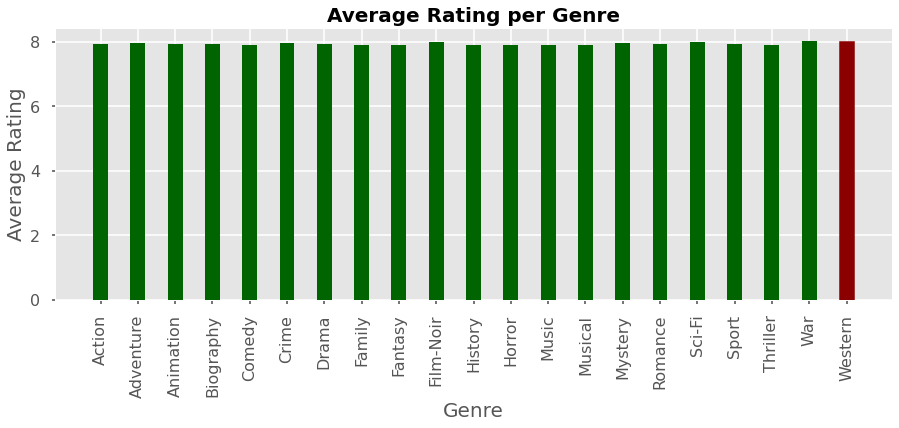

In [71]:
#On average which genre is the most highly rated?
x_axis_joined_result = joined_result['Genre']
y_axis_joined_result = joined_result["Averages_By_Genre"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_result, y_axis_joined_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[20].set_color('darkred')
plt.xlabel('Genre', fontsize = 20)
plt.ylabel("Average Rating", fontsize = 20)
plt.title("Average Rating per Genre", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

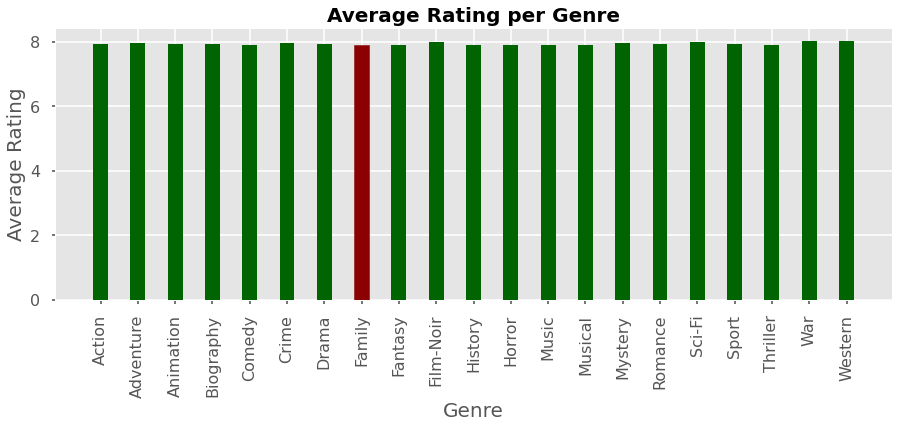

In [72]:
#On average which genre is the least rated?
x_axis_joined_result = joined_result['Genre']
y_axis_joined_result = joined_result["Averages_By_Genre"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_result, y_axis_joined_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[7].set_color('darkred')
plt.xlabel('Genre', fontsize = 20)
plt.ylabel("Average Rating", fontsize = 20)
plt.title("Average Rating per Genre", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

In [73]:
joined_gross_result
joined_gross_result=joined_gross_result.reset_index()
joined_gross_result

,Genre,Total_Gross,Genre_Count,Averages
0,Action,219877.96,152,1446.565526
1,Adventure,281283.29,168,1674.305298
2,Animation,85731.37,66,1298.960152
3,Biography,53045.78,96,552.560208
4,Comedy,121836.27,184,662.153641
5,Crime,69426.56,160,433.916000
6,Drama,273952.14,557,491.835081
7,Family,44574.34,46,969.007391
8,Fantasy,60825.44,56,1086.168571
9,Film-Noir,508.31,9,56.478889


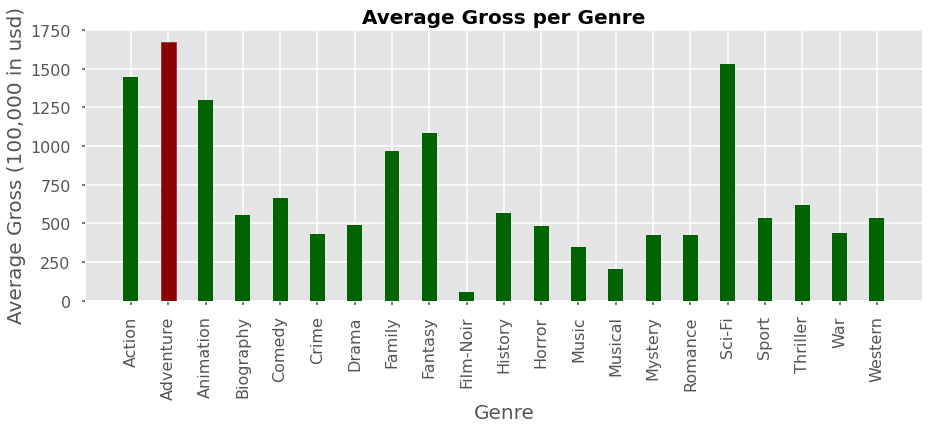

In [74]:
#On average which movie genre makes the most gross money?
x_axis_joined_gross_result = joined_gross_result['Genre']
y_axis_joined_gross_result = joined_gross_result["Averages"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_gross_result, y_axis_joined_gross_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[1].set_color('darkred')
plt.xlabel('Genre', fontsize = 20)
plt.ylabel("Average Gross (100,000 in usd)", fontsize = 20)
plt.title("Average Gross per Genre", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

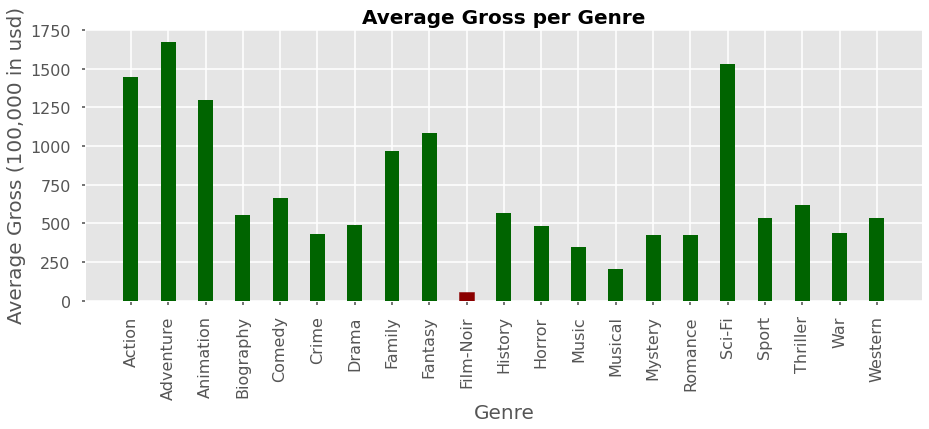

In [75]:
#On average which movie genre makes the least gross money?
x_axis_joined_gross_result = joined_gross_result['Genre']
y_axis_joined_gross_result = joined_gross_result["Averages"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_gross_result, y_axis_joined_gross_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[9].set_color('darkred')
plt.xlabel('Genre', fontsize = 20)
plt.ylabel("Average Gross (100,000 in usd)", fontsize = 20)
plt.title("Average Gross per Genre", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

In [76]:
joined_certificate_result
joined_certificate_result=joined_certificate_result.reset_index()
joined_certificate_result

,Certificate,Total Rating,Certificate Count,Averages
0,A,1440.5,180,8.002778
1,Approved,48.1,6,8.016667
2,G,80.3,10,8.030000
3,GP,15.7,2,7.850000
4,PG,189.7,24,7.904167
5,PG-13,303.5,39,7.782051
6,Passed,185.4,23,8.060870
7,R,1062.7,135,7.871852
8,TV-PG,8.0,1,8.000000
9,U,1593.8,200,7.969000


In [77]:
joined_certificate_result

,Certificate,Total Rating,Certificate Count,Averages
0,A,1440.5,180,8.002778
1,Approved,48.1,6,8.016667
2,G,80.3,10,8.030000
3,GP,15.7,2,7.850000
4,PG,189.7,24,7.904167
5,PG-13,303.5,39,7.782051
6,Passed,185.4,23,8.060870
7,R,1062.7,135,7.871852
8,TV-PG,8.0,1,8.000000
9,U,1593.8,200,7.969000


In [79]:
#CAUTION: Run this cell when running all previus cells, then comment this cell. 
#Delete unrated, U/A, and TV-PG because there is only 1 or 2 count. 


#joined_certificate_result=joined_certificate_result.drop([3,8,10,12])

In [80]:
joined_certificate_result["Averages"].max()

8.06086956521739

In [81]:
joined_certificate_result["Averages"].min()

7.782051282051284

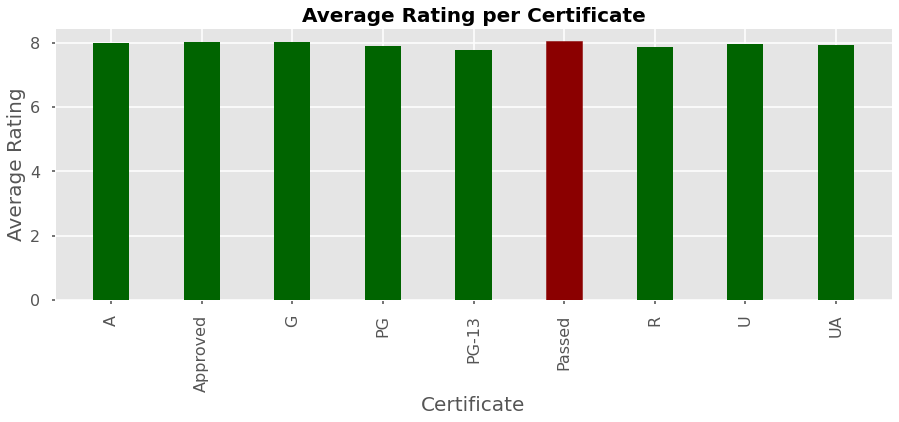

In [82]:
#On average by certificate which movie is most highly rated? 
x_axis_joined_certificate_result = joined_certificate_result['Certificate']
y_axis_joined_certificate_result = joined_certificate_result["Averages"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_certificate_result, y_axis_joined_certificate_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[-4].set_color('darkred')
plt.xlabel('Certificate', fontsize = 20)
plt.ylabel("Average Rating", fontsize = 20)
plt.title("Average Rating per Certificate", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

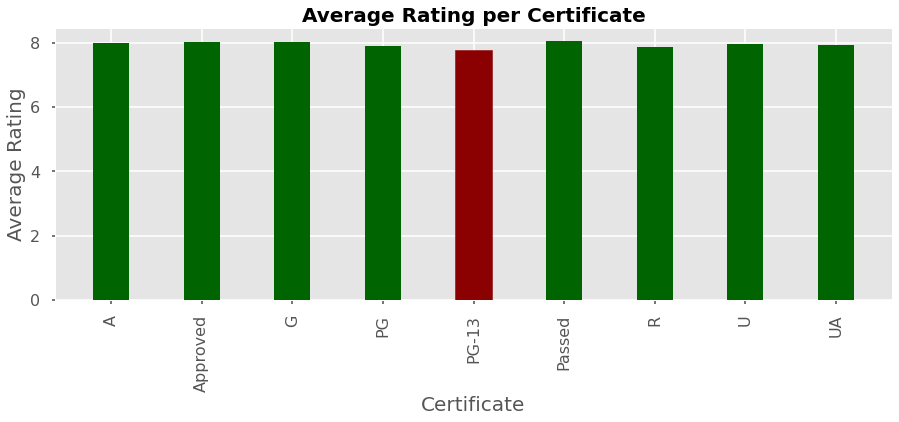

In [83]:
#On average by certificate which movie get the lowest rating?
x_axis_joined_certificate_result = joined_certificate_result['Certificate']
y_axis_joined_certificate_result = joined_certificate_result["Averages"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_certificate_result, y_axis_joined_certificate_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[-5].set_color('darkred')
plt.xlabel('Certificate', fontsize = 20)
plt.ylabel("Average Rating", fontsize = 20)
plt.title("Average Rating per Certificate", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

In [84]:
joined_certificate_gross_result
joined_certificate_gross_result=joined_certificate_gross_result.reset_index()
joined_certificate_gross_result

,Certificate,Total Gross,Certificate Count,Averages
0,A,114996.84,180,638.871333
1,Approved,416.94,6,69.490000
2,G,4959.63,10,495.963000
3,GP,14.17,2,7.085000
4,PG,4293.19,24,178.882917
5,PG-13,14409.69,39,369.479231
6,Passed,1250.18,23,54.355652
7,R,34821.37,135,257.936074
8,TV-PG,1.07,1,1.070000
9,U,174493.14,200,872.465700


In [85]:
#CAUTION: Run this cell when running all previus cells, then comment this cell. 
#Delete unrated, U/A, and TV-PG because there is only 1 or count. 
joined_certificate_gross_result=joined_certificate_gross_result.drop([3,8,10,12])
joined_certificate_gross_result

,Certificate,Total Gross,Certificate Count,Averages
0,A,114996.84,180,638.871333
1,Approved,416.94,6,69.490000
2,G,4959.63,10,495.963000
4,PG,4293.19,24,178.882917
5,PG-13,14409.69,39,369.479231
6,Passed,1250.18,23,54.355652
7,R,34821.37,135,257.936074
9,U,174493.14,200,872.465700
11,UA,213767.89,163,1311.459448


In [86]:
joined_certificate_gross_result["Averages"].max()

1311.4594478527604

In [87]:
joined_certificate_gross_result["Averages"].min()

54.355652173913036

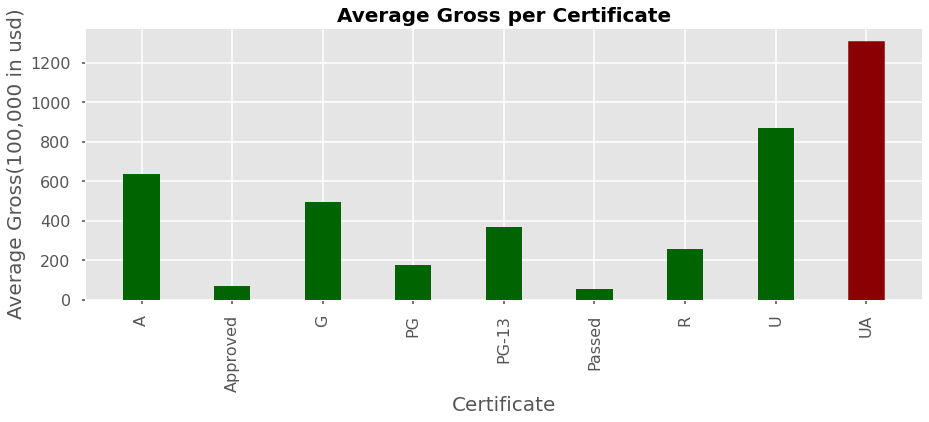

In [88]:
#On average by certificate which movies make the most money? 
x_axis_joined_certificate_gross_result = joined_certificate_gross_result['Certificate']
y_axis_joined_certificate_gross_result = joined_certificate_gross_result["Averages"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_certificate_gross_result, y_axis_joined_certificate_gross_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[-1].set_color('darkred')
plt.xlabel('Certificate', fontsize = 20)
plt.ylabel("Average Gross(100,000 in usd)", fontsize = 20)
plt.title("Average Gross per Certificate", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

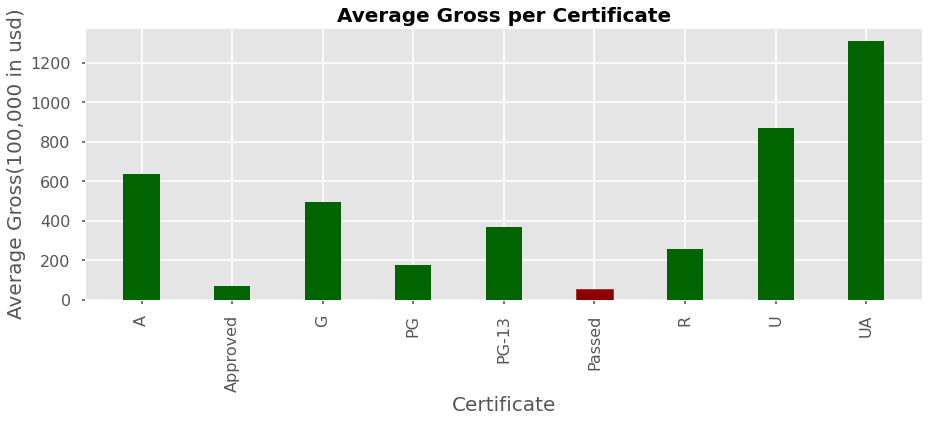

In [89]:
#On average by certificate which movies make the least money? 
x_axis_joined_certificate_gross_result = joined_certificate_gross_result['Certificate']
y_axis_joined_certificate_gross_result = joined_certificate_gross_result["Averages"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_certificate_gross_result, y_axis_joined_certificate_gross_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[-4].set_color('darkred')
plt.xlabel('Certificate', fontsize = 20)
plt.ylabel("Average Gross(100,000 in usd)", fontsize = 20)
plt.title("Average Gross per Certificate", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

In [90]:
#GRAPHS TO PUT ON SLIDESHOW -----------------------------------------------------------------------------------------------------------------------------

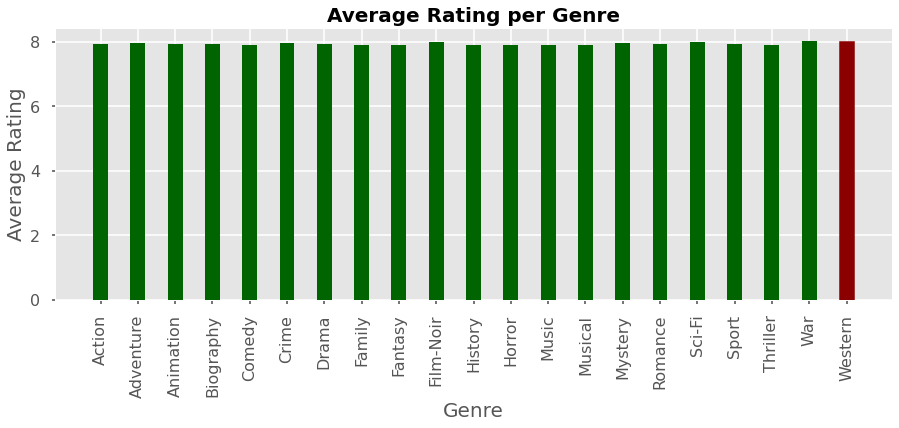

In [91]:
#Current Graphs and questions (in comments)
#On average which genre is the highest rated and which genre is the least rated?
x_axis_joined_result = joined_result['Genre']
y_axis_joined_result = joined_result["Averages_By_Genre"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_result, y_axis_joined_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[20].set_color('darkred')
plt.xlabel('Genre', fontsize = 20)
plt.ylabel("Average Rating", fontsize = 20)
plt.title("Average Rating per Genre", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

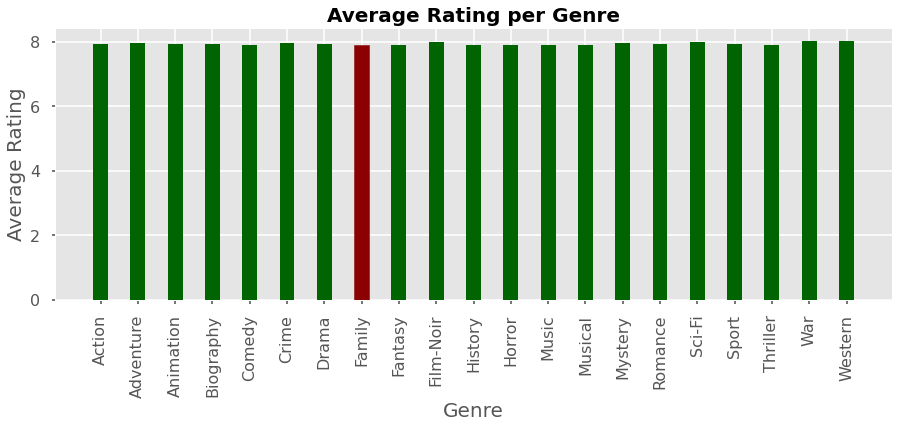

In [92]:
#Current Graphs and questions (in comments)
#On average which genre is the highest rated and which genre is the least rated?
x_axis_joined_result = joined_result['Genre']
y_axis_joined_result = joined_result["Averages_By_Genre"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_result, y_axis_joined_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[7].set_color('darkred')
plt.xlabel('Genre', fontsize = 20)
plt.ylabel("Average Rating", fontsize = 20)
plt.title("Average Rating per Genre", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

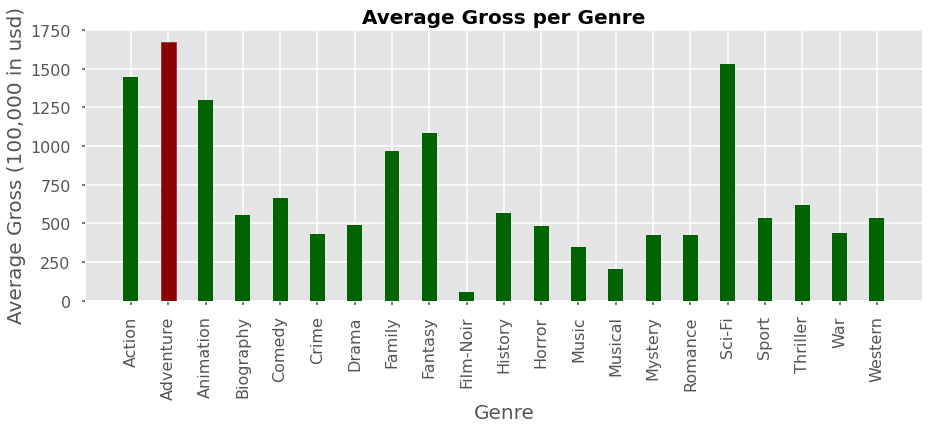

In [93]:
#Current Graphs and questions (in comments)
#On average which movie genre makes the most gross money and which genre makes the least?
x_axis_joined_gross_result = joined_gross_result['Genre']
y_axis_joined_gross_result = joined_gross_result["Averages"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_gross_result, y_axis_joined_gross_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[1].set_color('darkred')
plt.xlabel('Genre', fontsize = 20)
plt.ylabel("Average Gross (100,000 in usd)", fontsize = 20)
plt.title("Average Gross per Genre", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

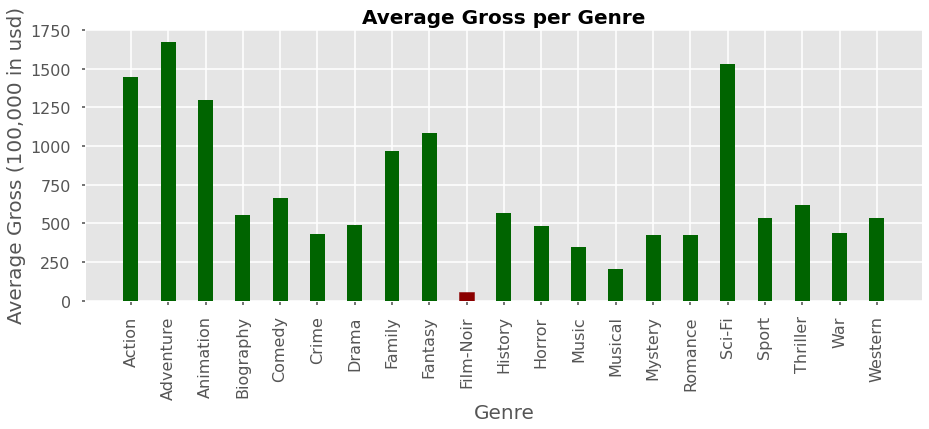

In [94]:
#Current Graphs and questions (in comments)
#On average which movie genre makes the most gross money and which genre makes the least?
x_axis_joined_gross_result = joined_gross_result['Genre']
y_axis_joined_gross_result = joined_gross_result["Averages"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_gross_result, y_axis_joined_gross_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[9].set_color('darkred')
plt.xlabel('Genre', fontsize = 20)
plt.ylabel("Average Gross (100,000 in usd)", fontsize = 20)
plt.title("Average Gross per Genre", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

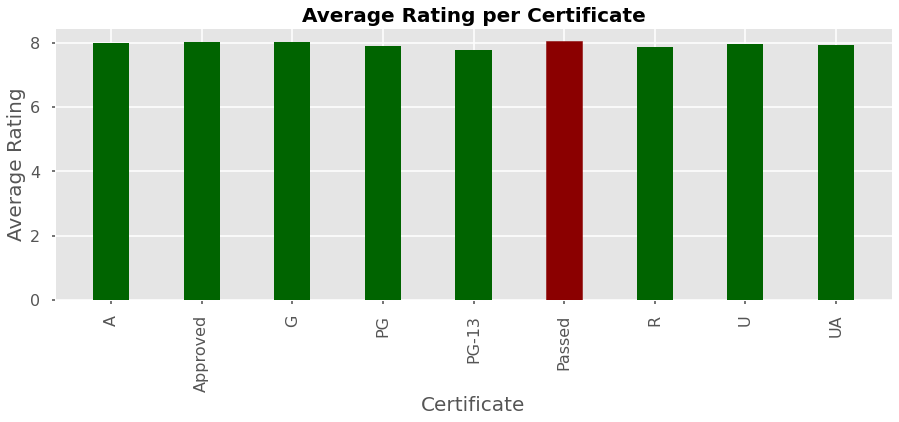

In [95]:
#On average by certificate which movies are most highly rated and which movies are the least?
x_axis_joined_certificate_result = joined_certificate_result['Certificate']
y_axis_joined_certificate_result = joined_certificate_result["Averages"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_certificate_result, y_axis_joined_certificate_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[-4].set_color('darkred')
plt.xlabel('Certificate', fontsize = 20)
plt.ylabel("Average Rating", fontsize = 20)
plt.title("Average Rating per Certificate", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

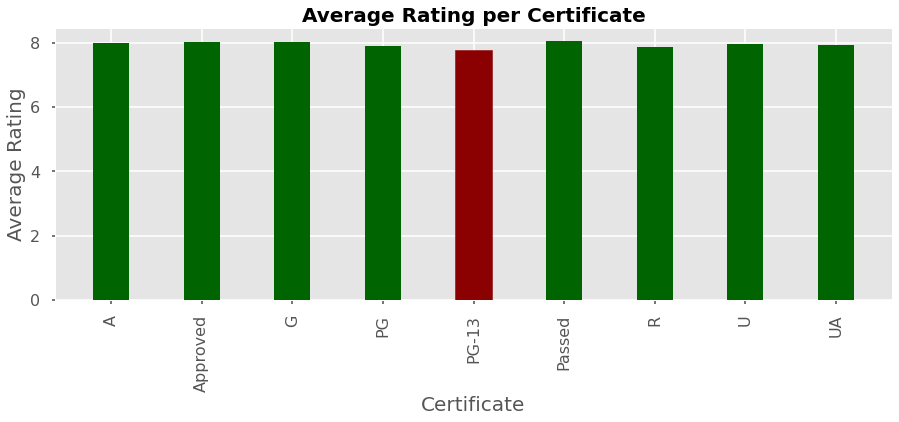

In [96]:
#Current Graphs and questions (in comments)
#On average by certificate which movies are most highly rated and which movies are the least?
x_axis_joined_certificate_result = joined_certificate_result['Certificate']
y_axis_joined_certificate_result = joined_certificate_result["Averages"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_certificate_result, y_axis_joined_certificate_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[-5].set_color('darkred')
plt.xlabel('Certificate', fontsize = 20)
plt.ylabel("Average Rating", fontsize = 20)
plt.title("Average Rating per Certificate", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

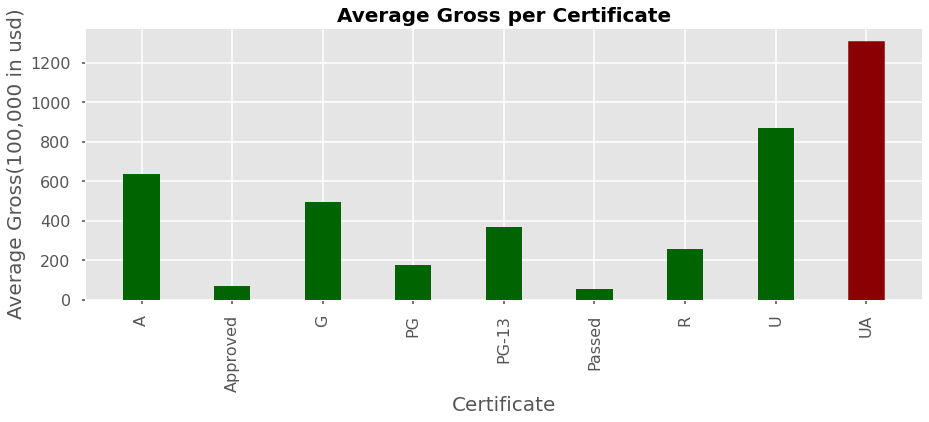

In [97]:
#Current Graphs and questions (in comments)
#On average which movie certficate makes the most gross money and  movie certficate makes the least?
x_axis_joined_certificate_gross_result = joined_certificate_gross_result['Certificate']
y_axis_joined_certificate_gross_result = joined_certificate_gross_result["Averages"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_certificate_gross_result, y_axis_joined_certificate_gross_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[-1].set_color('darkred')
plt.xlabel('Certificate', fontsize = 20)
plt.ylabel("Average Gross(100,000 in usd)", fontsize = 20)
plt.title("Average Gross per Certificate", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()

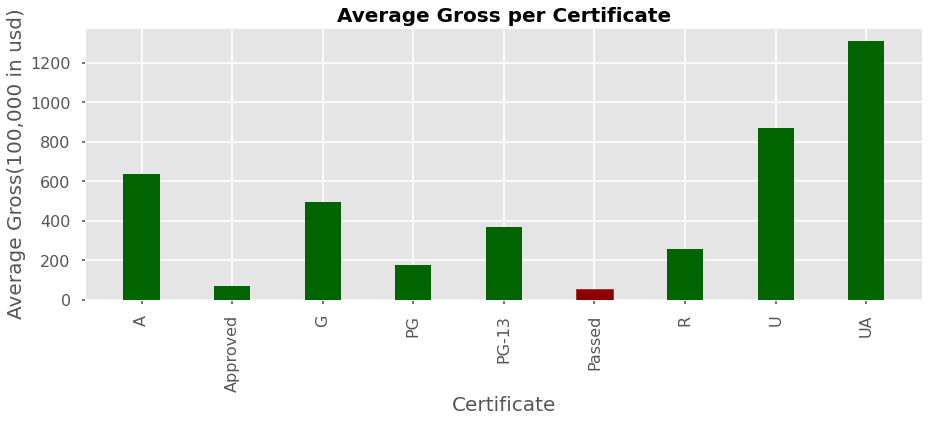

In [98]:
#Current Graphs and questions (in comments)
#On average which movie certficate makes the most gross money and  movie certficate makes the least?
x_axis_joined_certificate_gross_result = joined_certificate_gross_result['Certificate']
y_axis_joined_certificate_gross_result = joined_certificate_gross_result["Averages"]
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.figure(figsize=(15,5))
barplot_genre = plt.bar(x_axis_joined_certificate_gross_result, y_axis_joined_certificate_gross_result, width=0.4, color='darkgreen', alpha=1, align="center")
barplot_genre[-4].set_color('darkred')
plt.xlabel('Certificate', fontsize = 20)
plt.ylabel("Average Gross(100,000 in usd)", fontsize = 20)
plt.title("Average Gross per Certificate", fontsize = 20, weight = 'bold')
plt.xticks(rotation=90)
plt.show()